# 다양체 학습 (Manifold Learning)

* 높은 차원의 데이터를 저차원으로 축소하는 방법

![manifold](https://scikit-learn.org/1.0/_images/sphx_glr_plot_compare_methods_001.png)

* 고차원 데이터를 2차원 또는 3차원으로 축소해 시각화에 활용할 수 있음
* 차원 축소 과정에서 중요하지 않은 정보는 버려지고 중요한 정보만 남기 때문에 데이터 정제에 활용 가능

## 데이터 생성 및 시각화 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [8]:
s_curve, color = datasets.make_s_curve(1000, random_state=0)

In [9]:
digits, labels = datasets.load_digits(return_X_y=True)
rand_proj = random_projection.SparseRandomProjection(n_components=3, random_state=0)
projected_digits = rand_proj.fit_transform(digits)

In [14]:
def min_max_scale(x):
    min_value, max_value = np.min(x,0), np.max(x,0)
    x = (x-min_value) / (max_value - min_value)
    return x

In [22]:
def plot_s_curve(s_curve, color, position, projection):
    s_curve = min_max_scale(s_curve)
    if projection == '3d':
        ax = plt.subplot(position, projection=projection)
        ax.scatter(s_curve[:,0], s_curve[:,1], s_curve[:,2], c=color, cmap=plt.cm.Spectral)
        ax.view_init(4, -72)
    elif projection == '2d':
        ax = plt.subplot(position)
        ax.scatter(s_curve[:,0], s_curve[:,1], c=color, cmap = plt.cm.Spectral)

In [20]:
def plot_digits(digits, labels, position, projection):
    digits = min_max_scale(digits)
    if projection == '3d':
        ax = plt.subplot(position, projection=projection)
        for i in range(digits.shape[0]):
            ax.text(digits[i,0], digits[i,1], digits[i,2], str(labels[i]), color=plt.cm.Set1(labels[i] / 10.),
                    fontdict={'weight' : 'bold', 'size' : 9})
        ax.view_init(4,-72)
    elif projection == '2d':
        ax = plt.subplot(position)
        for i in range(digits.shape[0]):
            ax.text(digits[i,0], digits[i,1], str(labels[i]), color=plt.cm.Set1(labels[i] / 10.),
                    fontdict={'weight' : 'bold', 'size' : 9})

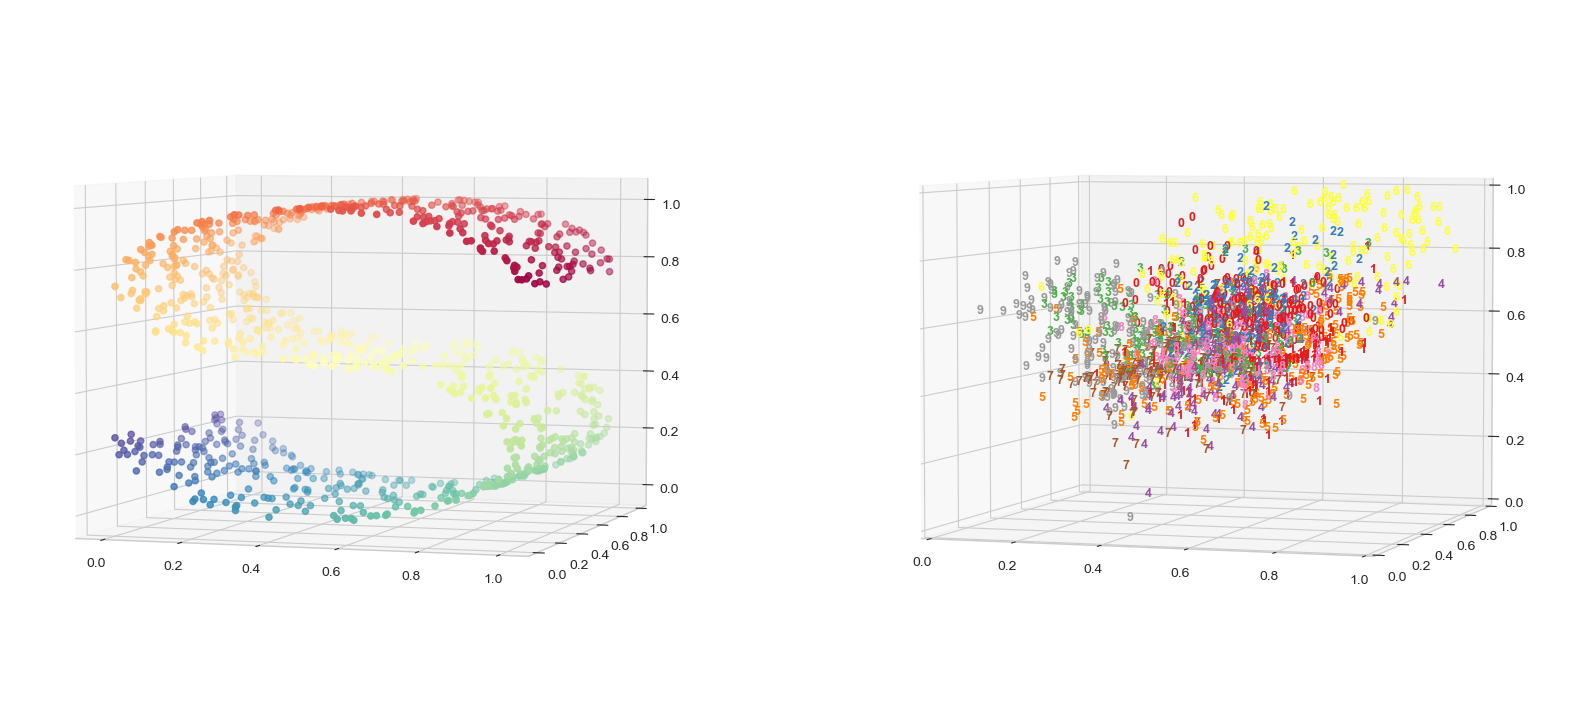

In [23]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve, color,121, '3d')
plot_digits(projected_digits, labels, 122, '3d')
#3차원으로 표현

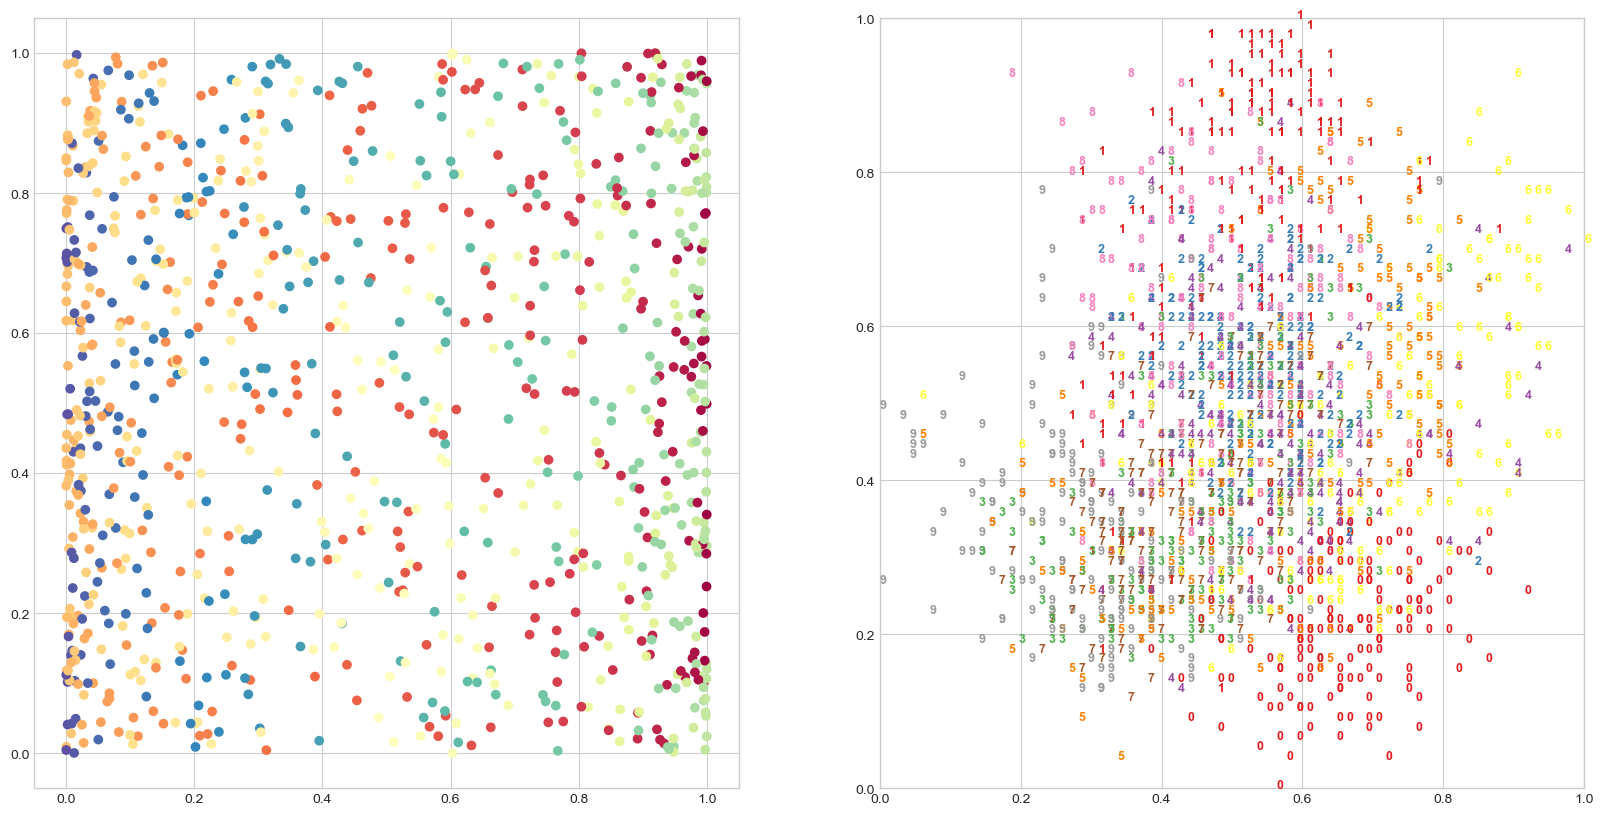

In [24]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve, color,121, '2d')
plot_digits(projected_digits, labels, 122, '2d')
#2차원으로 표현

* 이렇게 3차원을 2차원으로 보면 정보가 손실 될 수 도 있는데 이를 방지하기 위한 알고리즘들

## Locally Linear Embedding (LLE)

* 국소 이웃 거리를 보존하는 저차원 임베딩을 찾음
* 근접한걸 유지하면서 저차원으로 바꿈

In [13]:
#n_componets = 차원을 뜻함
s_curve_lle = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=2,
                                              method='standard', random_state=0).fit_transform(s_curve)
digits_lle = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=3,
                                              method='standard', random_state=0).fit_transform(digits)

In [5]:
digits.shape

(1797, 64)

In [15]:
digits_lle.shape

(1797, 3)

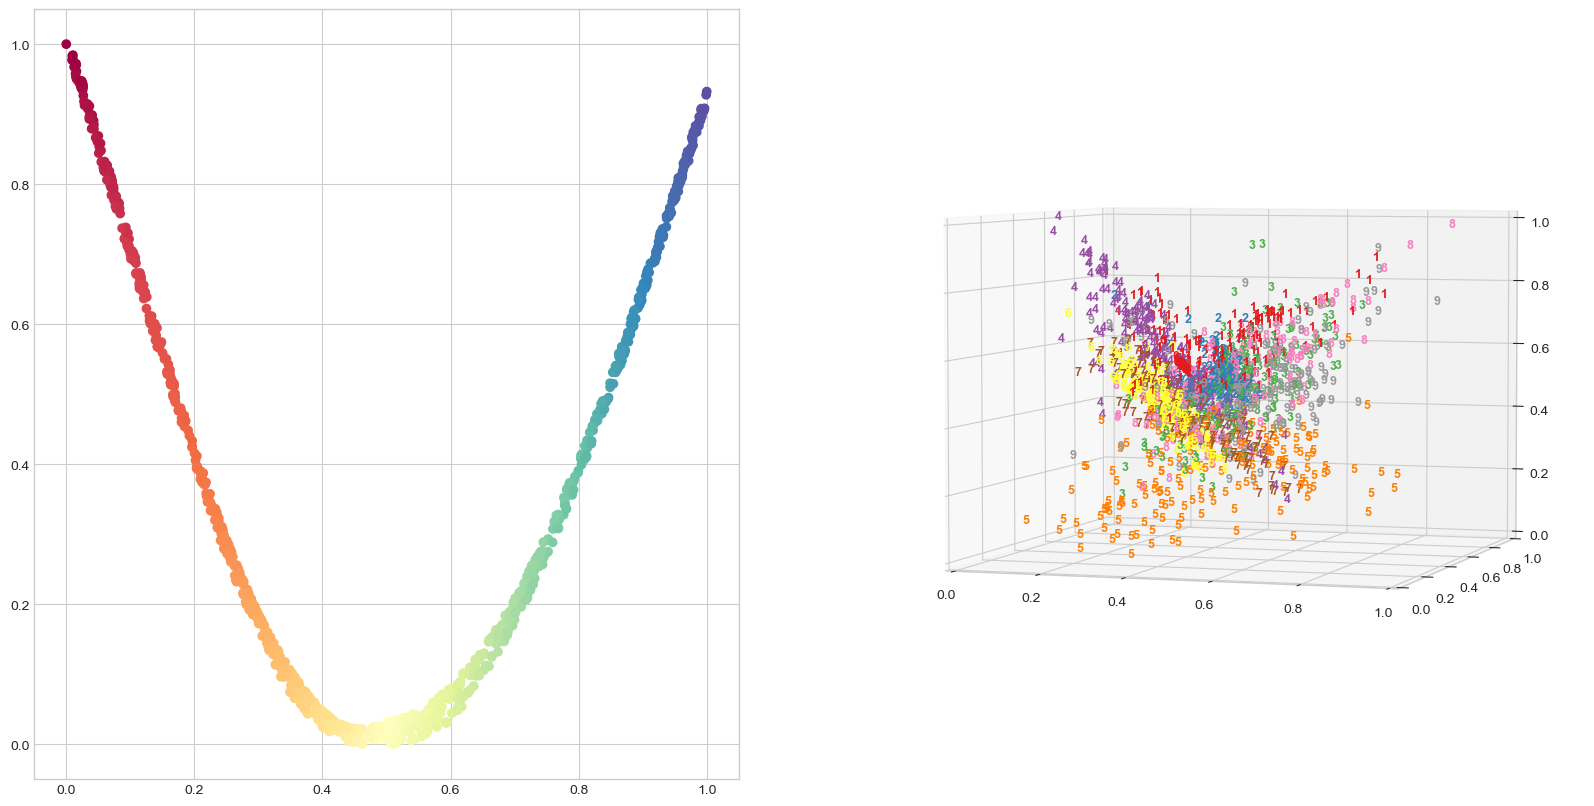

In [27]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_lle, color,121, '2d')
plot_digits(digits_lle, labels, 122, '3d')

## Local Tangent Space Alignment (LTSA)

* 탄젠트 공간을 통해 각 이웃의 국소 성질을 특성화
* 국소 탄젠트 공간을 정렬

In [28]:
#n_componets = 차원을 뜻함
s_curve_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=2,
                                              method='ltsa', random_state=0).fit_transform(s_curve)
digits_ltsa = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=3,
                                              method='ltsa', random_state=0).fit_transform(digits)

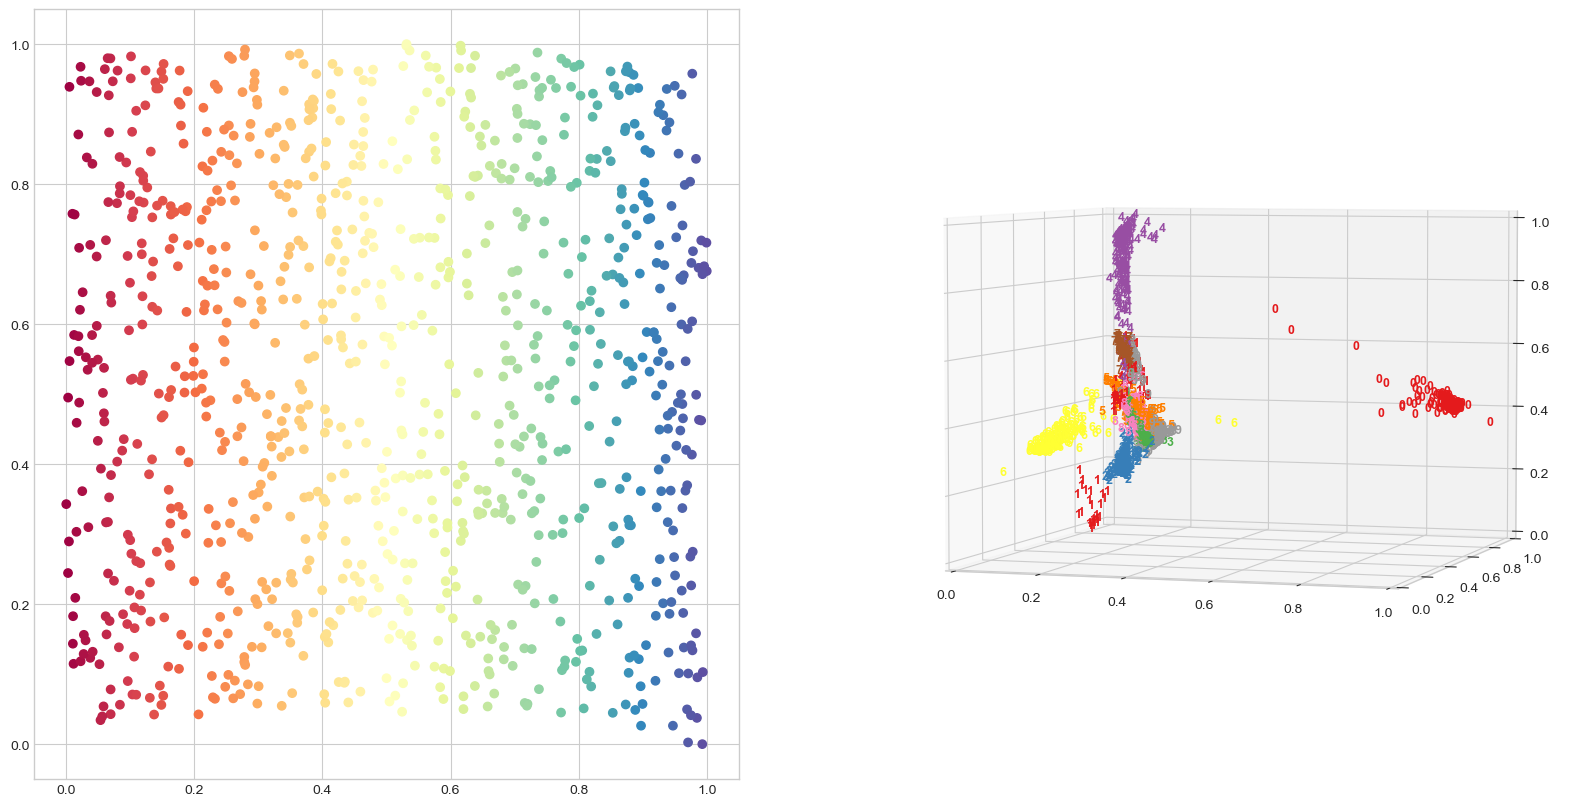

In [29]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_ltsa, color,121, '2d')

plot_digits(digits_ltsa, labels, 122, '3d')

## Hessian Eigenmapping

* LLE의 문제를 해결한 다른 방법
* 국소 선형 구조를 복원하기 위해 각 이웃에서 hessian 기반의 이차 형태를 중심으로 회전

In [30]:
#n_componets = 차원을 뜻함
s_curve_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=2,
                                              method='hessian', random_state=0).fit_transform(s_curve)
digits_hlle = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=3,
                                              method='hessian', random_state=0).fit_transform(digits)

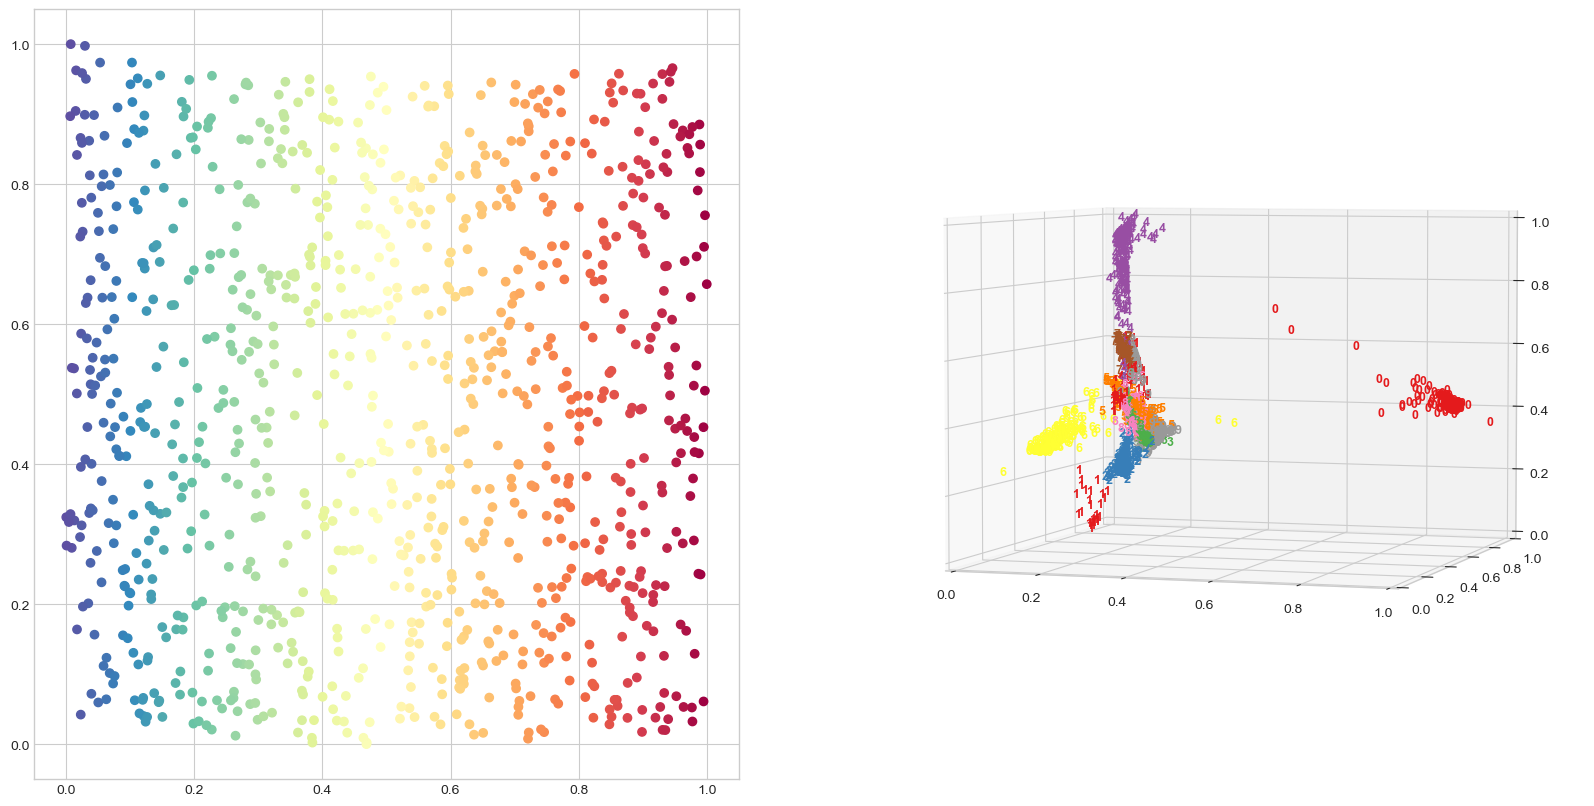

In [31]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_hlle, color,121, '2d')
plot_digits(digits_hlle, labels, 122, '3d')

## Modified Locally Linear Embedding

* 각 이웃에 여러 가중치 벡터를 사용
* n_neighbors > n_components를 만족해야 함

In [32]:
#n_componets = 차원을 뜻함
s_curve_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=2,
                                              method='modified', random_state=0).fit_transform(s_curve)
digits_mlle = manifold.LocallyLinearEmbedding(n_neighbors=30,n_components=3,
                                              method='modified', random_state=0).fit_transform(digits)

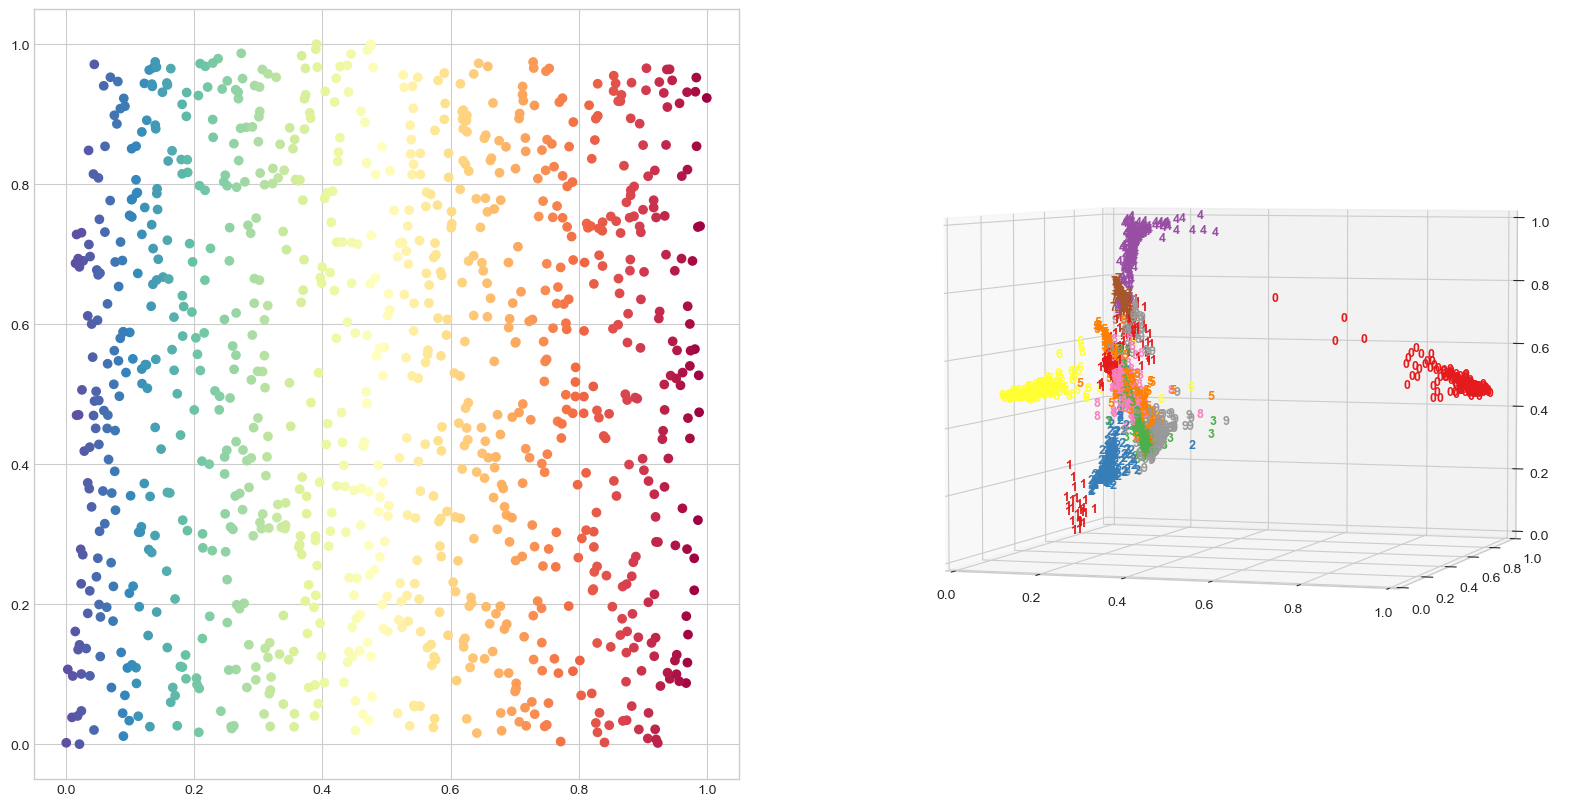

In [33]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_mlle, color,121, '2d')
plot_digits(digits_mlle, labels, 122, '3d')

## Isomap

* 초기의 다양체 학습 알고리즘
* MDS와 커널 PCA의 확장으로 볼 수 있음
* 모든 점들 사이의 측지 거리를 유지하는 저차원 임베딩을 찾음

In [34]:
#n_componets = 차원을 뜻함
s_curve_isomap = manifold.Isomap(n_neighbors=30,n_components=2).fit_transform(s_curve)
digits_isomap = manifold.Isomap(n_neighbors=30,n_components=3).fit_transform(digits)

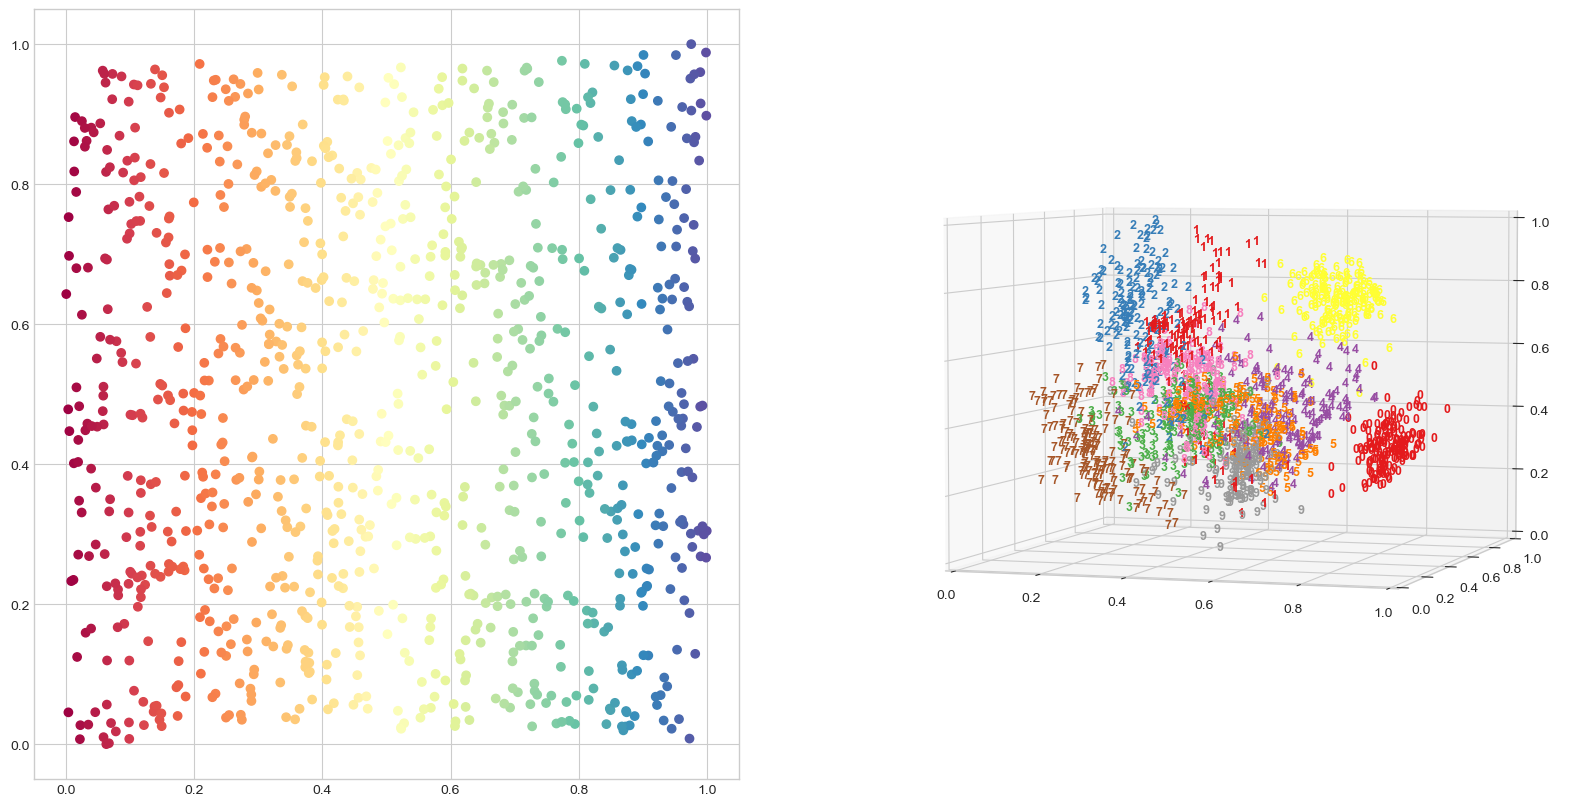

In [35]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_isomap, color,121, '2d')
plot_digits(digits_isomap, labels, 122, '3d')

## Multi-Dimensional Scaling (MDS)

* 고차원 공간에서의 거리를 고려하는 저차원 공간을 찾음

In [37]:
#n_componets = 차원을 뜻함
s_curve_mds = manifold.MDS(n_components=2, random_state=0).fit_transform(s_curve)
digits_mds = manifold.MDS(n_components=3, random_state=0).fit_transform(digits)

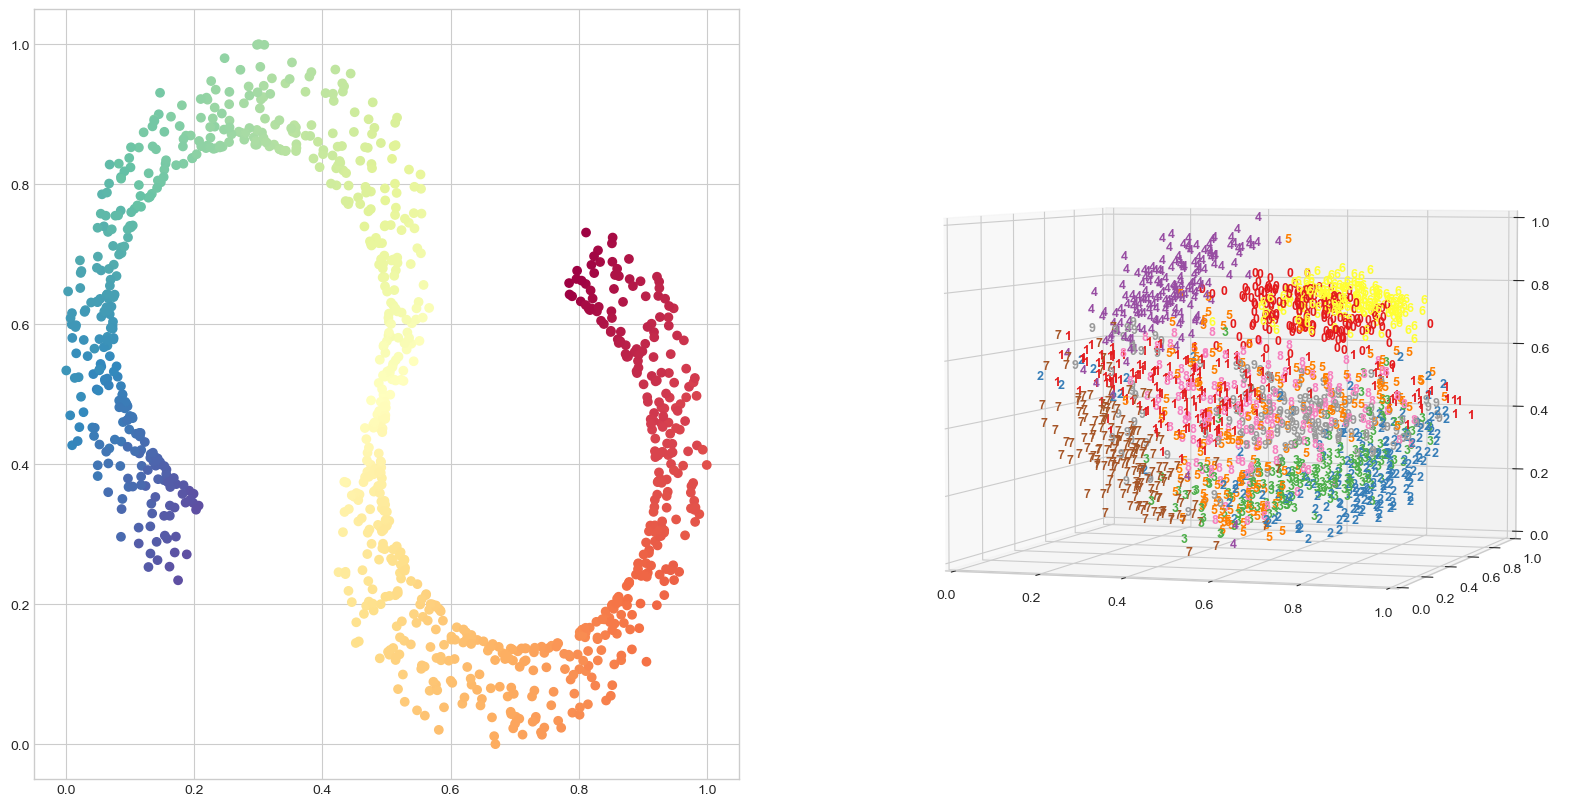

In [38]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_mds, color,121, '2d')
plot_digits(digits_mds, labels, 122, '3d')

## Spectral Embedding

* 스펙트럼 분해를 통해 데이터의 저차원 표현을 찾음
* 데이터의 점이 저차원 공간에서도 서로 가깝게 유지되도록 함

In [39]:
#n_componets = 차원을 뜻함
s_curve_se = manifold.SpectralEmbedding(n_components=2, random_state=0).fit_transform(s_curve)
digits_se = manifold.SpectralEmbedding(n_components=3, random_state=0).fit_transform(digits)

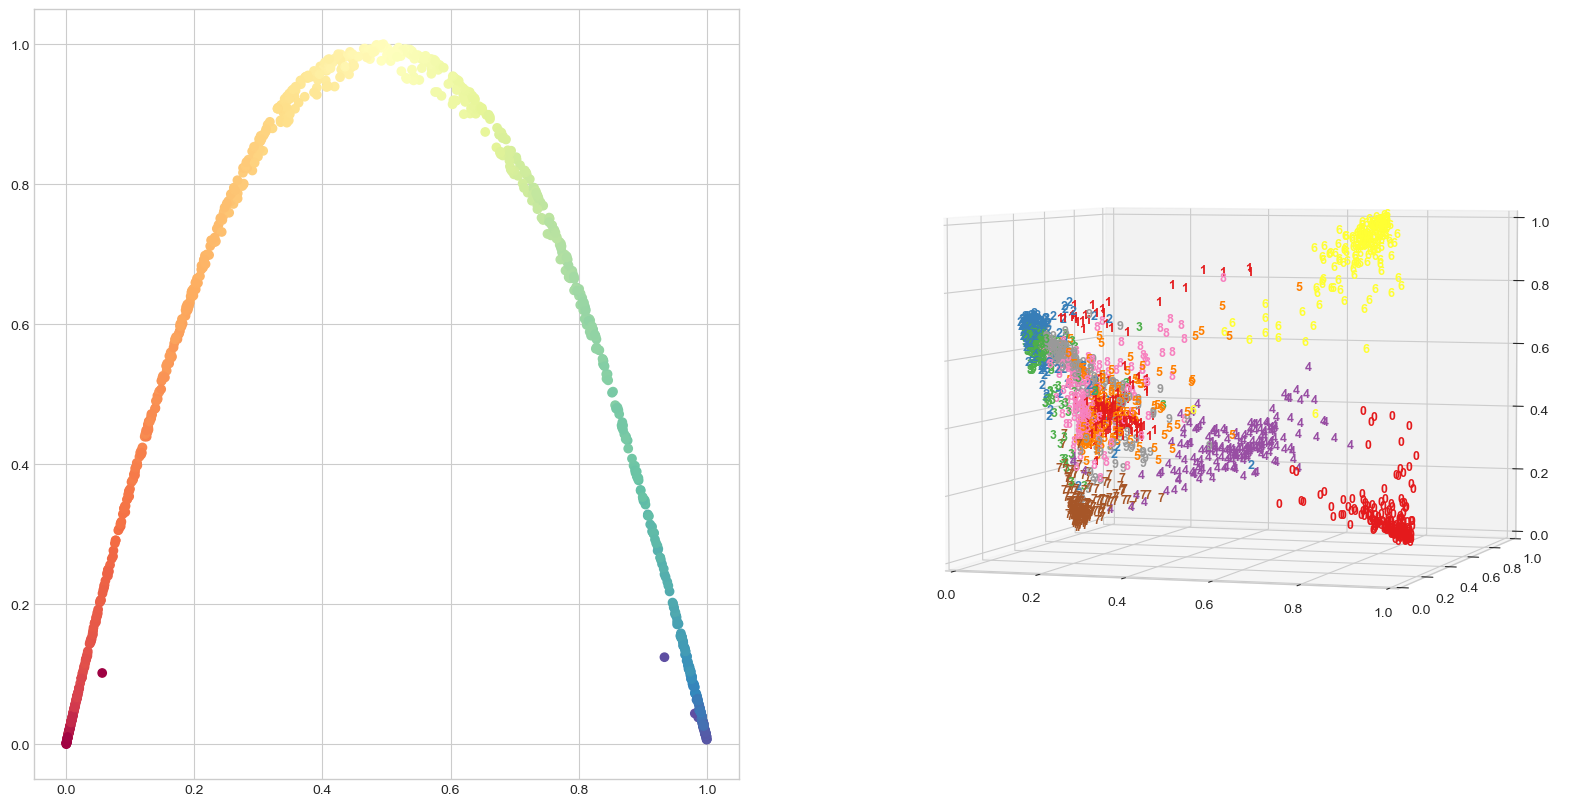

In [40]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_se, color,121, '2d')
plot_digits(digits_se, labels, 122, '3d')

## t-distributed Stochastic Neighbor Embedding (t-SNE)

* 데이터 포인트의 유사성을 확률로 변환
* 국소 구조에 민감
* 국소 구조를 기반으로 샘플 그룹을 추출하는데 강함
* 항상 KL발산의 국소 최소값에서 끝남
* 계산 비용이 많이 듬
* 전역 구조를 보존하지 않음

In [41]:
#n_componets = 차원을 뜻함
s_curve_tsne = manifold.TSNE(n_components=2, random_state=0).fit_transform(s_curve)
digits_tsne = manifold.TSNE(n_components=3, random_state=0).fit_transform(digits)

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


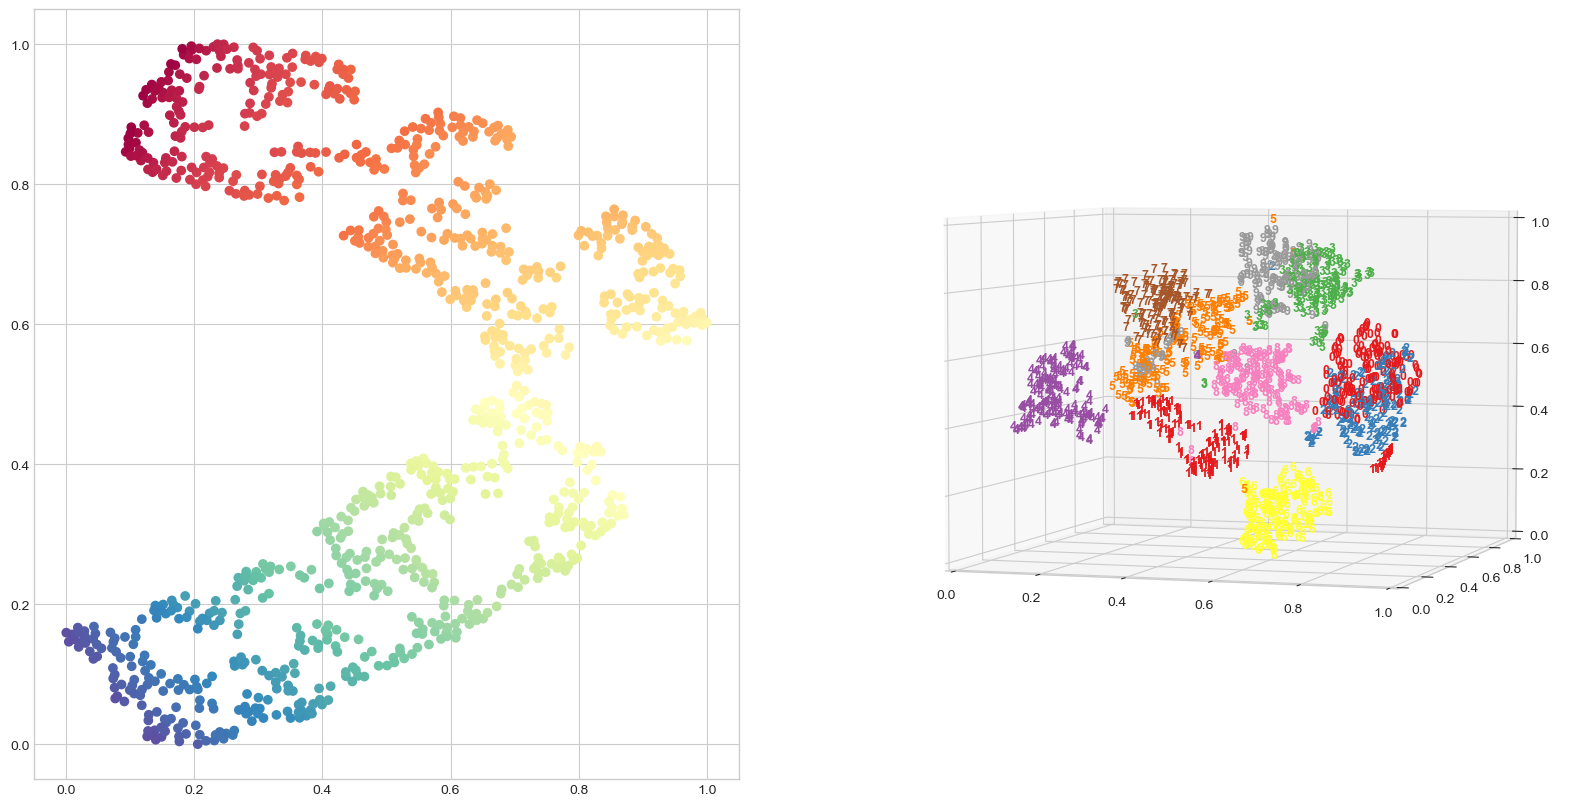

In [42]:
fig = plt.figure(figsize=(20,10))
plot_s_curve(s_curve_tsne, color,121, '2d')
plot_digits(digits_tsne, labels, 122, '3d')

## 정제된 표현을 이용한 학습
* 다양체 학습의 결과를 정제된 데이터로 생각할 수 있음
* 정제된 표현이기 때문에 분석에 비교적 용이함
* 기계학습 모델의 입력으로 사용했을때 성능향상을 기대할 수 있음

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [44]:
raw_digits, target = datasets.load_digits(return_X_y=True)

### 원본 데이터를 사용할 때

In [45]:
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

#### KNN

In [46]:
score = cross_val_score(
    estimator=knn,
    X=raw_digits, y=target,
    cv=5
)
score

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

In [48]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9627282575054161 (+/- 0.011168537355954218)


#### SVM

In [49]:
score = cross_val_score(
    estimator=svm,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [50]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9632838130609718 (+/- 0.02008605863225686)


#### Decision Tree

In [67]:
score = cross_val_score(
    estimator=decision_tree,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.78888889, 0.70555556, 0.80501393, 0.8356546 , 0.80222841])

In [68]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.7874682760755184 (+/- 0.043724923940350935)


#### Random Forest

In [55]:
score = cross_val_score(
    estimator=random_forest,
    X=raw_digits, y=target,
    cv=5
)
score

array([0.93611111, 0.91666667, 0.95264624, 0.96100279, 0.92200557])

In [56]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9376864747756113 (+/- 0.017074248180322396)


### 정제된 데이터를 사용할 때

#### KNN

In [57]:
score = cross_val_score(
    estimator=knn,
    X=digits_tsne, y=target,
    cv=5
)
score

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

array([0.96388889, 0.96388889, 0.98328691, 0.99164345, 0.96935933])

In [58]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9744134942742185 (+/- 0.011159643225931395)


#### SVM

In [59]:
score = cross_val_score(
    estimator=svm,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.95      , 0.93333333, 0.98328691, 0.98885794, 0.96100279])

In [60]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9632961931290621 (+/- 0.02065358544710109)


#### Decision Tree

In [61]:
score = cross_val_score(
    estimator=decision_tree,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.96388889, 0.87222222, 0.98050139, 0.97214485, 0.9275766 ])

In [62]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9432667904673476 (+/- 0.03984756301199831)


#### Random Forest

In [63]:
score = cross_val_score(
    estimator=random_forest,
    X=digits_tsne, y=target,
    cv=5
)
score

array([0.95555556, 0.91388889, 0.99164345, 0.98885794, 0.97214485])

In [64]:
print('mean cross val score: {} (+/- {})'.format(score.mean(), score.std()))

mean cross val score: 0.9644181367997525 (+/- 0.028390047920836166)
